# EJERCICIO 4 - PRACTICA 2

#### Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es 
el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes atendidos
previamente.

In [27]:

 # configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)


In [29]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn import model_selection,preprocessing

from ClassPerceptron import Perceptron

In [30]:

import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'Drug5.csv' # archivo drugs

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX


### Numerizacion de atributos ordinales (Sex, BP, Cholesterol)

In [33]:
mapeo = {'Sex': {'F':1, 'M':0},
          'BP':{'HIGH':2, 'NORMAL':1, 'LOW':0},
          'Cholesterol':{'NORMAL':0, 'HIGH':1}}

df.replace(mapeo, inplace=True)
print(df)

     Age  Sex  BP  Cholesterol        Na         K   Drug
0     23    1   2            1  0.792535  0.031258  drugY
1     47    0   0            1  0.739309  0.056468  drugC
2     47    0   0            1  0.697269  0.068944  drugC
3     28    1   1            1  0.563682  0.072289  drugX
4     61    1   0            1  0.559294  0.030998  drugY
..   ...  ...  ..          ...       ...       ...    ...
195   56    1   0            1  0.848774  0.073380  drugC
196   16    0   0            1  0.743021  0.061886  drugC
197   52    0   1            1  0.549945  0.055581  drugX
198   23    0   1            0  0.784520  0.055959  drugX
199   40    1   0            0  0.683503  0.060226  drugX

[200 rows x 7 columns]


C:\Users\W10\AppData\Local\Temp\ipykernel_7532\295256908.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapeo, inplace=True)


In [48]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(df.iloc[:,:-1])   # X contiene todas las columnas menos la columna 'Drug' --> variables de entrada
T = np.array((df['Drug'] == 'drugY') * 1)  # T es la variable objetivo que se intenta predecir. se está transformando la columna Drug en un array 
                                           # binario donde 1 indica que el fármaco es drugY y 0 indica que es cualquier otro fármaco. 
                                           # Esto se hace para poder predecir si el fármaco es drugY o no.
nColum = ['Otra', 'drugY']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(     #Se dividen los datos en conjuntos de entrenamiento y testeo.
        X, T, test_size=0.30, random_state=42)                           #El 30% de los datos se reserva para testear el modelo, mientras que el 70% restante se usa para entrenar.

normalizarEntrada = 1  # 1 si normaliza; 0 si no                   #se normalizan los datos
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

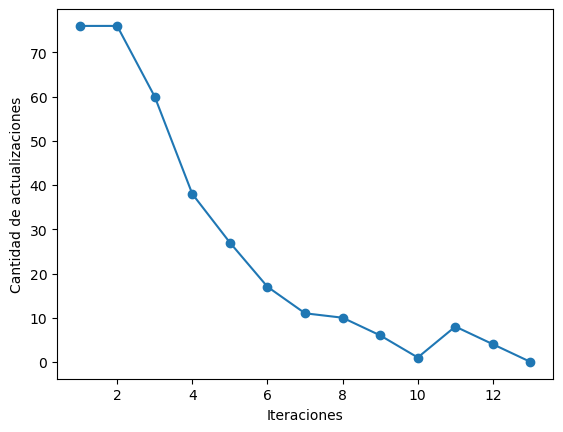

In [42]:
ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None)
# alpha=0.01 --> tasa de aprendizaje
# n_iter=65 --> es cuántas veces el algoritmo pasa por todo el conjunto de entrenamiento para ajustar los pesos
# random_state=None --> Esto controla la inicialización aleatoria del modelo. Si es None, la inicialización será diferente cada vez que corras el script.

ppn.fit(X_train, T_train) #  Esta línea entrena el perceptrón utilizando los datos de entrenamiento (X_train) y las etiquetas (T_train).   
                          # Durante este proceso, el perceptrón ajusta sus pesos para minimizar los errores en la predicción.

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# ppn.errors_: Durante el entrenamiento, el perceptrón guarda en esta lista la cantidad de errores de clasificación o actualizaciones de pesos que ocurrieron en cada iteración.
# plt.plot(...): Esta línea genera un gráfico de la cantidad de errores en función del número de iteraciones.
#Idealmente, deberías ver que la cantidad de errores disminuye a medida que el modelo aprende, lo que indicaría que el perceptrón está convergiendo hacia una solución óptima.

In [44]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))


aciertos =  59
% de aciertos = 98.33 %
